I'm woking on this file - Deepesh


In [ ]:
# Collaborator-Section : Deepesh
# !pip install tf-nightly

In [ ]:
# ! pip install tensorflow --upgrade

In [ ]:
import sys
import keras
import cv2
import matplotlib
import numpy
import skimage

from keras.models import Sequential
from keras.layers import Conv2D
from keras.optimizers import Adam
from skimage.measure import compare_ssim as ssim
import cv2
import numpy as np
import math
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import *
from keras.layers import *
from keras.preprocessing import image
%matplotlib inline

In [ ]:
from keras.backend import manual_variable_initialization
manual_variable_initialization(True)

In [ ]:
# getting the COVID-19 Dataset
!wget "https://www.dropbox.com/sh/sdynqdazi37kr5w/AADN7fKJfOtBCcyUxbsz-50ua?dl=0"

--2021-06-18 07:19:51--  https://www.dropbox.com/sh/sdynqdazi37kr5w/AADN7fKJfOtBCcyUxbsz-50ua?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/sdynqdazi37kr5w/AADN7fKJfOtBCcyUxbsz-50ua [following]
--2021-06-18 07:19:51--  https://www.dropbox.com/sh/raw/sdynqdazi37kr5w/AADN7fKJfOtBCcyUxbsz-50ua
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0867cc0d8152c86d64493d1e07.dl.dropboxusercontent.com/zip_download_get/A0BPlsuJL3CXdEiqvVE_2_k0-txhKV38Cu9pJykU_1BhJufSN5_DJRz_aTYWR16AVmdWeDkWhDPQcd0KUxfIriL1Nk8vxr8_J-lW29-ZhMXszQ# [following]
--2021-06-18 07:19:52--  https://uc0867cc0d8152c86d64493d1e07.dl.dropboxusercontent.com/zip_download_get/A0BPlsuJL3CXdEiqvVE_2_k0-txhKV38Cu9pJykU_1BhJufSN5_DJRz_aTYWR16AVmdWeDkWhDPQcd0K

In [ ]:
# unzipping the COVID-19 Dataset
!unzip AADN7fKJfOtBCcyUxbsz-50ua?dl=0

Archive:  AADN7fKJfOtBCcyUxbsz-50ua?dl=0
mapname:  conversion of  failed
   creating: Val/
   creating: Train/
   creating: Val/Covid/
   creating: Val/Normal/
   creating: Train/Covid/
   creating: Train/Normal/
 extracting: Val/Covid/AR-2.jpg      
 extracting: Val/Covid/AR-1.jpg      
 extracting: Val/Covid/c601f50d.jpg  
 extracting: Val/Covid/a361d7b7.jpg  
 extracting: Val/Covid/90986ce4.jpg  
 extracting: Val/Covid/bd10d5e2.jpg  
 extracting: Val/Covid/b9673e89.jpg  
 extracting: Train/Covid/paving.jpg  
 extracting: Val/Covid/c3829ecb.jpg  
 extracting: Val/Covid/ac4f6e4e.jpg  
 extracting: Val/Covid/a8ac1969.jpg  
 extracting: Val/Covid/bb0e626a.jpg  
 extracting: Val/Covid/c0f74558.jpg  
 extracting: Val/Covid/a2eba651.jpg  
 extracting: Val/Covid/16747_1_1.jpg  
 extracting: Val/Covid/16953_4_1.jpg  
 extracting: Val/Covid/16953_5_1.jpg  
 extracting: Val/Covid/16953_3_1.jpg  
 extracting: Val/Covid/16865_1_1.jpg  
 extracting: Val/Covid/16745_5_1.png  
 extracting: Train/Co

In [ ]:
# getting the super-resolution images
!wget "https://www.dropbox.com/sh/bf17umpe9mu3sil/AAAmR6lEb_0C5LTgiflHYGUra?dl=0"

--2021-06-18 07:20:00--  https://www.dropbox.com/sh/bf17umpe9mu3sil/AAAmR6lEb_0C5LTgiflHYGUra?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/bf17umpe9mu3sil/AAAmR6lEb_0C5LTgiflHYGUra [following]
--2021-06-18 07:20:00--  https://www.dropbox.com/sh/raw/bf17umpe9mu3sil/AAAmR6lEb_0C5LTgiflHYGUra
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce26ba85b215956b2cd662b3b55.dl.dropboxusercontent.com/zip_download_get/A0Cng-Zfyh6yEgCXVSLVBi8g6IRdUxjrFmew3bnkW9WoXBTkKNxLqtBEnUib5KCYsHyIOLpROJ6p1t8I-dNiq20TqHRqKd8V4L_viAYiW_1E5Q# [following]
--2021-06-18 07:20:01--  https://uce26ba85b215956b2cd662b3b55.dl.dropboxusercontent.com/zip_download_get/A0Cng-Zfyh6yEgCXVSLVBi8g6IRdUxjrFmew3bnkW9WoXBTkKNxLqtBEnUib5KCYsHyIOLpROJ6p1t8I

In [ ]:
# unzipping the super-resolution images
!unzip AAAmR6lEb_0C5LTgiflHYGUra?dl=0

Archive:  AAAmR6lEb_0C5LTgiflHYGUra?dl=0
mapname:  conversion of  failed
   creating: png_sr_source/
 extracting: png_sr_source/man.png   
 extracting: png_sr_source/face.png  
 extracting: png_sr_source/ppt3.png  
 extracting: png_sr_source/lenna.png  
 extracting: png_sr_source/comic.png  
 extracting: png_sr_source/zebra.png  
 extracting: png_sr_source/bridge.png  
 extracting: png_sr_source/baboon.png  
 extracting: png_sr_source/pepper.png  
 extracting: png_sr_source/flowers.png  
 extracting: png_sr_source/bird_GT.png  
 extracting: png_sr_source/baby_GT.png  
 extracting: png_sr_source/head_GT.png  
 extracting: png_sr_source/foreman.png  
 extracting: png_sr_source/monarch.png  
 extracting: png_sr_source/barbara.png  
 extracting: png_sr_source/woman_GT.png  
 extracting: png_sr_source/coastguard.png  
 extracting: png_sr_source/butterfly_GT.png  

1 archive had fatal errors.


In [ ]:
# creating a folder for degraded images (for training super-resolution model)
if not os.path.exists('degraded_images'):
    os.makedirs('degraded_images')
    print("Successful")

Successful


In [ ]:
# PSNR (Peak-signal-to-noise ratio model)
def psnr(target, ref):
  target_data = target.astype(float)
  ref_data = ref.astype(float)

  diff = ref_data - target_data
  diff = diff.flatten('C')

  rmse = math.sqrt(np.mean(diff ** 2.))
  return 20 * math.log10(255. / rmse)

In [ ]:
#MSE (Mean squared error model)
def mse(target, ref):
  err = np.sum((target.astype('float') - ref.astype('float')) ** 2)
  err /= float(target.shape[0] * target.shape[1])

  return err

In [ ]:
# Function for comparing images
def compare_images(target, ref):
  scores = []
  scores.append(psnr(target, ref))
  scores.append(mse(target, ref))
  scores.append(ssim(target, ref, multichannel =True))

  return scores

In [ ]:
# Function to degrade the images and saving them into degraded_images folder to train super-resolution model
def prepare_images(path, factor):
    
    # loop through the files in the directory
    for file in os.listdir(path):
        
        # open the file
        img = cv2.imread(path + file)
        # find old and new image dimensions
        h, w, _ = img.shape
        new_height = int (h / factor)
        new_width = int (w / factor)
        
        # resize the image - down
        img = cv2.resize(img, (new_width, new_height), interpolation = cv2.INTER_LINEAR)
        
        # resize the image - up
        img = cv2.resize(img, (w, h), interpolation = cv2.INTER_LINEAR)
        
        # save the image
        print('Saving {}'.format(file))
        cv2.imwrite('degraded_images/{}'.format(file), img)

In [ ]:
prepare_images('png_sr_source/', 2)

Saving coastguard.png
Saving zebra.png
Saving woman_GT.png
Saving flowers.png
Saving foreman.png
Saving pepper.png
Saving bridge.png
Saving butterfly_GT.png
Saving head_GT.png
Saving ppt3.png
Saving lenna.png
Saving bird_GT.png
Saving man.png
Saving comic.png
Saving monarch.png
Saving face.png
Saving barbara.png
Saving baby_GT.png
Saving baboon.png


In [ ]:
# define the SRCNN model
def model():
    
    # define model type
    SRCNN = Sequential()
    
    # add model layers
    SRCNN.add(Conv2D(filters=128, kernel_size = (9, 9), kernel_initializer='glorot_uniform',
                     activation='relu', padding='valid', use_bias=True, input_shape=(None, None, 1)))
    SRCNN.add(Conv2D(filters=64, kernel_size = (3, 3), kernel_initializer='glorot_uniform',
                     activation='relu', padding='same', use_bias=True))
    SRCNN.add(Conv2D(filters=1, kernel_size = (5, 5), kernel_initializer='glorot_uniform',
                     activation='linear', padding='valid', use_bias=True))
    
    # define optimizer
    adam = Adam(lr=0.0003)
    
    # compile model
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    
    return SRCNN

In [ ]:
#deploying SRCNN Model

# define necessary image processing functions

def modcrop(img, scale):
    tmpsz = img.shape
    sz = tmpsz[0:2]
    sz = sz - np.mod(sz, scale)
    img = img[0:sz[0], 1:sz[1]]
    return img


def shave(image, border):
    img = image[border: -border, border: -border]
    return img

In [ ]:
# Downloading the pre-trained weights for training super-resolution model quicker
!wget "https://www.dropbox.com/sh/742mdslv3qsld5g/AACgDnwEnXzV32KCcpzUsO-Ea?dl=0"

--2021-06-18 07:20:02--  https://www.dropbox.com/sh/742mdslv3qsld5g/AACgDnwEnXzV32KCcpzUsO-Ea?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/742mdslv3qsld5g/AACgDnwEnXzV32KCcpzUsO-Ea [following]
--2021-06-18 07:20:02--  https://www.dropbox.com/sh/raw/742mdslv3qsld5g/AACgDnwEnXzV32KCcpzUsO-Ea
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc62c1f0020cbc12dced7fac1ab5.dl.dropboxusercontent.com/zip_download_get/A0Cr8GDXSxqCtD4nS9rXuM0xt6fS2uhetz5QaBQBYXjbdWMw92E8c5BnSG8rFfqnJeflZ3pt8SJVTFJrqg3a8POoJzDXUzfQQiNDtwkaHevF8A# [following]
--2021-06-18 07:20:03--  https://uc62c1f0020cbc12dced7fac1ab5.dl.dropboxusercontent.com/zip_download_get/A0Cr8GDXSxqCtD4nS9rXuM0xt6fS2uhetz5QaBQBYXjbdWMw92E8c5BnSG8rFfqnJeflZ3pt8SJVTFJr

In [ ]:
# unzipping the weights
!unzip AACgDnwEnXzV32KCcpzUsO-Ea?dl=0

Archive:  AACgDnwEnXzV32KCcpzUsO-Ea?dl=0
mapname:  conversion of  failed
 extracting: SRCNN_model.h5          
 extracting: detection_model.h5      
 extracting: 3051crop_weight_200.h5  

1 archive had fatal errors.


In [ ]:
# define main prediction function for super-resolution
def predict(image_path):
    
    # load the srcnn model with weights
    srcnn = model()
    srcnn.load_weights('3051crop_weight_200.h5')
    path, file = os.path.split(image_path)

    degraded = cv2.imread(image_path)

    # preprocess the image with modcrop
    degraded = modcrop(degraded, 3)
    
    # convert the image to YCrCb - (srcnn trained on Y channel)
    temp = cv2.cvtColor(degraded, cv2.COLOR_BGR2YCrCb)
    
    # create image slice and normalize  
    Y = numpy.zeros((1, temp.shape[0], temp.shape[1], 1), dtype=float)
    Y[0, :, :, 0] = temp[:, :, 0].astype(float) / 255
    
    # perform super-resolution with srcnn
    pre = srcnn.predict(Y, batch_size=1)
    
    # post-process output
    pre *= 255
    pre[pre[:] > 255] = 255
    pre[pre[:] < 0] = 0
    pre = pre.astype(np.uint8)
    
    # copy Y channel back to image and convert to BGR
    temp = shave(temp, 6)
    temp[:, :, 0] = pre[0, :, :, 0]
    output = cv2.cvtColor(temp, cv2.COLOR_YCrCb2BGR)
    
    # remove border from degraged image
    degraded = shave(degraded.astype(np.uint8), 6)

    # return images and scores
    return output

In [ ]:
# defining training and testing paths for COVID detection

TRAIN_PATH = "Train"
VAL_PATH = "Val"

In [ ]:
# Defining model for COVID-19 Detection

def detectionModel():
    detection_model = Sequential()
    detection_model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
    detection_model.add(Conv2D(64,(3,3),activation='relu'))
    detection_model.add(MaxPooling2D(pool_size=(2,2)))
    detection_model.add(Dropout(0.25))

    detection_model.add(Conv2D(64,(3,3),activation='relu'))
    detection_model.add(MaxPooling2D(pool_size=(2,2)))
    detection_model.add(Dropout(0.25))

    detection_model.add(Conv2D(128,(3,3),activation='relu'))
    detection_model.add(MaxPooling2D(pool_size=(2,2)))
    detection_model.add(Dropout(0.25))

    detection_model.add(Flatten())
    detection_model.add(Dense(64,activation='relu'))
    detection_model.add(Dropout(0.5))
    detection_model.add(Dense(1,activation='sigmoid'))
    
    detection_model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam',metrics=['accuracy'])  
    return detection_model

# Collaborator-Section : Deepesh
# There is sa bug in TF in which you have to use "sparse_categorical_accuracy" instead of "accuray". I'm attaching a link to satck ang git for the same
# stack - https://stackoverflow.com/questions/64541824/keras-giving-low-accuracy-after-loading-model/65237653
# git   - https://github.com/tensorflow/tensorflow/issues/42459
# Original ::
# detection_model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

# Updated ::
# detection_model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['sparse_categorical_accuracy'])

In [ ]:
# detection_model = detectionModel()
# detection_model.summary()

In [ ]:
# Defining ImageDataGenerator for training and testing the COVID-19 Detection model

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
# Creating folders for saving sr_output in sr_ouput folder

if not os.path.exists('sr_output'):
    os.makedirs('sr_output')
    print("Successful")

if not os.path.exists('sr_output/train'):
    os.makedirs('sr_output/train')
    print("Successful")

if not os.path.exists('sr_output/test'):
    os.makedirs('sr_output/test')
    print("Successful")

if not os.path.exists('sr_output/train/covid'):
    os.makedirs('sr_output/train/covid')
    print("Successful")

if not os.path.exists('sr_output/train/normal'):
    os.makedirs('sr_output/train/normal')
    print("Successful")

if not os.path.exists('sr_output/test/covid'):
    os.makedirs('sr_output/test/covid')
    print("Successful")

if not os.path.exists('sr_output/test/normal'):
    os.makedirs('sr_output/test/normal')
    print("Successful")

Successful
Successful
Successful
Successful
Successful
Successful
Successful


In [ ]:
for file in os.listdir('Train/Covid'):
    # perform super-resolution
    output = predict('Train/Covid/{}'.format(file))
    
    img = Image.fromarray(output, 'RGB')

    print('Saving {}'.format(file))
    img.save('sr_output/train/covid/{}.png'.format(os.path.splitext(file)[0]))
    img.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Saving 16660_4_1.jpg
Saving ryct.2020200028.fig1a.jpeg
Saving 1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg
Saving 7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg
Saving covid-19-pneumonia-93.png
Saving 48c4542c.jpg
Saving 8da14fff.jpg
Saving 441c9cdd.jpg
Saving e1446fe8.jpg
Saving 88de9d8c39e946abd495b37cd07d89e5-2ee6-0.jpg
Saving covid-19-pneumonia-rapidly-progressive-admission.jpg
Saving extubation-4.jpg
Saving ryct.2020200034.fig5-day4.jpeg
Saving 5f619d7e.jpg
Saving covid-19-pneumonia-rapidly-progressive-3-days.jpg
Saving ec083e35.jpg
Saving yxppt-2020-02-19_00-51-27_287214-day8.jpg
Saving 1-s2.0-S1684118220300682-main.pdf-003-b1.png
Saving 88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg
Saving ryct.2020003.fig2-b.png
Saving ryct.2020003.fig2-a.png
Saving 1-s2.0-S1684118220300608-main.pdf-002.jpg
Saving lancet-case2a.jpg
Saving covid-19-pneumonia-53.jpg
Saving 6b44464d-73a7-4cf3-bbb6-ffe7168300e3.annot.original.jpeg
Saving f64132c8.jpg
Saving 12941_2020_358_Fig1_HTML.jpg
Saving 16672_1_1.jpg
Sa

In [ ]:
for file in os.listdir('Train/Normal'):
    # perform super-resolution
    output = predict('Train/Normal/{}'.format(file))
    
    img = Image.fromarray(output, 'RGB')

    print('Saving {}'.format(file))
    img.save('sr_output/train/normal/{}.png'.format(os.path.splitext(file)[0]))
    img.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Saving NORMAL2-IM-0757-0001.jpeg
Saving NORMAL2-IM-1365-0001.jpeg
Saving IM-0347-0001.jpeg
Saving NORMAL2-IM-1280-0001.jpeg
Saving IM-0592-0001.jpeg
Saving NORMAL2-IM-0775-0001.jpeg
Saving IM-0612-0001.jpeg
Saving NORMAL2-IM-0814-0001.jpeg
Saving NORMAL2-IM-0603-0001.jpeg
Saving IM-0300-0001.jpeg
Saving NORMAL2-IM-0848-0001.jpeg
Saving IM-0755-0001.jpeg
Saving NORMAL2-IM-0523-0001.jpeg
Saving IM-0511-0001-0002.jpeg
Saving IM-0738-0001.jpeg
Saving IM-0464-0001.jpeg
Saving NORMAL2-IM-0386-0001.jpeg
Saving IM-0442-0001.jpeg
Saving IM-0652-0001.jpeg
Saving IM-0722-0001.jpeg
Saving IM-0294-0001.jpeg
Saving IM-0549-0001-0001.jpeg
Saving NORMAL2-IM-0832-0001-0001.jpeg
Saving NORMAL2-IM-1272-0001.jpeg
Saving IM-0604-0001.jpeg
Saving IM-0659-0001.jpeg
Saving NORMAL2-IM-0832-0001.jpeg
Saving IM-0295-0001.jpeg
Saving NORMAL2-IM-1269-0001-0001.jpeg
Saving NORMAL2-IM-0416-0001-0002.jpeg
Saving IM-0583-0001.jpeg
Saving IM-0172-0001.jpeg
Saving NORMAL2-IM-0693-0001.jpeg
Saving IM-0519-0001-0001.jpeg


In [ ]:
for file in os.listdir('Val/Covid'):
    # perform super-resolution
    output = predict('Val/Covid/{}'.format(file))
    
    img = Image.fromarray(output, 'RGB')

    print('Saving {}'.format(file))
    img.save('sr_output/test/covid/{}.png'.format(os.path.splitext(file)[0]))
    img.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Saving BMJ-37-163-g1.jpg
Saving 41379_2020_536_Fig2_HTML-c1.png
Saving covid-19-pneumonia-7-PA.jpg
Saving AR-1.jpg
Saving 353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB.jpeg
Saving 16953_5_1.jpg
Saving bd10d5e2.jpg
Saving b0f1684d1ee90dc09deef015e29dae_jumbo.jpeg
Saving covid-19-caso-82-1-8.png
Saving ac4f6e4e.jpg
Saving 41182_2020_203_Fig3_HTML.jpg
Saving 16747_1_1.jpg
Saving covid-19-caso-94-1-14.png
Saving 41591_2020_819_Fig1_HTML.webp-day5.png
Saving all14238-fig-0001-m-c.jpg
Saving covid-19-pneumonia-22-day2-pa.png
Saving 80446565-E090-4187-A031-9D3CEAA586C8.jpeg
Saving covid-19-pneumonia-20.jpg
Saving 40779_2020_233_Fig2_HTML-a.png
Saving covid-19-caso-70-1-PA.jpg
Saving article_river_e4d185c06e3511eaa2321d8ab357a1de-c1mn.png
Saving bb0e626a.jpg
Saving covid-19-pneumonia-8.jpg
Saving AR-2.jpg
Saving 41591_2020_819_Fig1_HTML.webp-day10.png
Saving covid-19-pneumonia-15-PA.jpg
Saving c601f50d.jpg
Saving 41182_2020_203_Fig4_HTML.jpg
Saving auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_

In [ ]:
for file in os.listdir('Val/Normal'):
    # perform super-resolution
    output = predict('Val/Normal/{}'.format(file))
    
    img = Image.fromarray(output, 'RGB')

    print('Saving {}'.format(file))
    img.save('sr_output/test/normal/{}.png'.format(os.path.splitext(file)[0]))
    img.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Saving NORMAL2-IM-1164-0001.jpeg
Saving NORMAL2-IM-1125-0001.jpeg
Saving NORMAL2-IM-1118-0001.jpeg
Saving NORMAL2-IM-0989-0001.jpeg
Saving NORMAL2-IM-1039-0001.jpeg
Saving NORMAL2-IM-1116-0001-0001.jpeg
Saving NORMAL2-IM-1106-0001.jpeg
Saving NORMAL2-IM-1086-0001.jpeg
Saving NORMAL2-IM-1256-0001.jpeg
Saving NORMAL2-IM-1089-0001.jpeg
Saving NORMAL2-IM-1008-0001.jpeg
Saving NORMAL2-IM-1059-0001.jpeg
Saving NORMAL2-IM-1247-0001.jpeg
Saving NORMAL2-IM-1142-0001-0002.jpeg
Saving NORMAL2-IM-1114-0001.jpeg
Saving NORMAL2-IM-1056-0001.jpeg
Saving NORMAL2-IM-1142-0001.jpeg
Saving NORMAL2-IM-1171-0001.jpeg
Saving NORMAL2-IM-1258-0001-0002.jpeg
Saving NORMAL2-IM-1189-0001.jpeg
Saving NORMAL2-IM-1127-0001.jpeg
Saving NORMAL2-IM-1200-0001.jpeg
Saving NORMAL2-IM-1091-0001.jpeg
Saving NORMAL2-IM-1117-0001.jpeg
Saving NORMAL2-IM-1050-0001.jpeg
Saving NORMAL2-IM-1214-0001.jpeg
Saving NORMAL2-IM-1169-0001.jpeg
Saving NORMAL2-IM-1194-0001.jpeg
Saving NORMAL2-IM-1026-0001.jpeg
Saving NORMAL2-IM-1154-0001-

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'sr_output/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 438 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

NameError: ignored

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'sr_output/test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 118 images belonging to 2 classes.


In [ ]:
validation_generator.class_indices

{'covid': 0, 'normal': 1}

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback =tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

In [ ]:
detection_model = detectionModel()
detection_model.summary()

Model: "sequential_556"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1668 (Conv2D)         (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1669 (Conv2D)         (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_1670 (Conv2D)         (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)     

In [ ]:
hist = detection_model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps=2,
    callbacks = [cp_callback]
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
8/8 [==============================] - 115s 13s/step - loss: 2.9771 - accuracy: 0.5413 - val_loss: 0.9001 - val_accuracy: 0.4844

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/20
8/8 [==============================] - 99s 12s/step - loss: 0.6208 - accuracy: 0.7136 - val_loss: 0.6663 - val_accuracy: 0.5000

Epoch 00002: saving model to training_1/cp.ckpt
Epoch 3/20
8/8 [==============================] - 107s 13s/step - loss: 0.5576 - accuracy: 0.7064 - val_loss: 0.6694 - val_accuracy: 0.5312

Epoch 00003: saving model to training_1/cp.ckpt
Epoch 4/20
8/8 [==============================] - 102s 13s/step - loss: 0.4178 - accuracy: 0.7869 - val_loss: 0.5441 - val_accuracy: 0.8125

Epoch 00004: saving model to training_1/cp.ckpt
Epoch 5/20
8/8 [==============================] - 99s 12s/step - loss: 0.3752 - accuracy: 0.8474 - val_loss: 0.3438 - val_accuracy: 0.9375

Epoch 00005: saving model to training_1/cp.ckpt
Epoch 6/20
8/8 [==============================] - 98s 13s

In [ ]:
def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

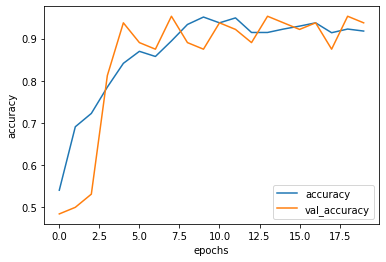

In [ ]:
plot_graph(hist, 'accuracy')

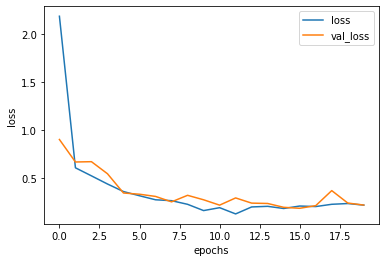

In [ ]:
plot_graph(hist, 'loss')